**АНАЛИЗ ПОВЕДЕНИЯ ПОЛЬЗОВАТЕЛЕЙ СЕТИ МЕГАЛАЙН**

### **Описание данных:**

* Таблица users (информация о пользователях):
* Таблица calls (информация о звонках):
* Таблица messages (информация о сообщениях):
* Таблица internet (информация об интернет-сессиях):
* Таблица tariffs (информация о тарифах):

## Предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import math
import numpy as np
import datetime

### **Таблица USERS**

In [2]:
# откроем первую таблицу
try:
    users = pd.read_csv('/--')
except:
    users = pd.read_csv('/path')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
# просмотри содержание таблицы
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
# изменю тип данных для столбца с датой
users['month'] = (pd.to_datetime(users['reg_date'], format='%Y-%m-%d')).dt.month

In [5]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [6]:
# есть 462 пропущенных значений в колонке "прекращение работы на тарифе"
# пропуски означают что человек все еще пользуется тарифом
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
month           0
dtype: int64

In [7]:
# заменю пропуски на "действующий"
users['churn_date'] = users['churn_date'].fillna('valid')

In [8]:
# посмотрим данные на предмет повторяющихся значений
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [9]:
# проверим на дубликаты
users.duplicated().sum()

0

### Таблица CALLS

In [10]:
try:
    calls = pd.read_csv('/--')
except:
    calls = pd.read_csv('/path')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [11]:
# проверим пропуски
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [12]:
# просмотрим данные
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [13]:
# округлим все минуты в соответствии с принципами Мегалайна, в сторону минут
# и сразу поменяю тип данных
calls['duration'] = (np.ceil(calls['duration'])).astype('int')

In [14]:
# время к типу временному
calls['month'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d').dt.month

In [15]:
# проверю на дубликаты
calls.duplicated().sum()

0

In [16]:
# соберу сводную таблицу, сгруппирую по месяцу и id, посчитаю суммарную продолжительность
# звонков по человеку по месяцу
calls_stat = calls.pivot_table(index=['user_id', 'month'],
                               values='duration', aggfunc=('count', 'sum'))

### Таблица MESSAGES

In [17]:
try:
    messages = pd.read_csv('/--')
except:
    messages = pd.read_csv('/path')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [18]:
# посмотрим данные таблицы
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [19]:
# проверим на пропуски
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
# добавим в столбец данные о месяце
messages['month'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d').dt.month

In [21]:
# проверю на дубликаты
messages.duplicated().sum()

0

In [22]:
# соберу сводную таблицу о кол-ве сообщений по каждому человеку за месяц
messages_stat = (messages
    .pivot_table(index=['user_id', 'month'], 
                 values='message_date', 
                 aggfunc='count')
                )

### Таблица INTERNET

In [23]:
try:
    internet = pd.read_csv('/----', index_col=0)
except:
    internet = pd.read_csv('/path', index_col=0)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


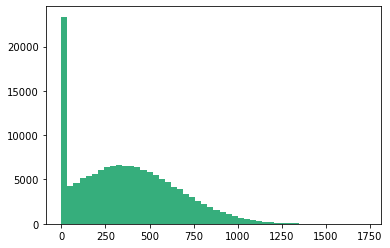

In [24]:
plt.hist(internet['mb_used'], bins=50, color='#36AE7C')
plt.show()

In [25]:
(internet.query('mb_used == 0').count() / len(internet)) * 100

id              13.118156
mb_used         13.118156
session_date    13.118156
user_id         13.118156
dtype: float64

In [26]:
# уберем нулевые сессии из датафрейма
internet = internet.query('mb_used != 0')

In [27]:
# просмотрю информацию о таблице
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            129798 non-null  object 
 1   mb_used       129798 non-null  float64
 2   session_date  129798 non-null  object 
 3   user_id       129798 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [28]:
# проверим названия колонок
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [29]:
# приведем дату к нужному формату
internet['month'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d').dt.month

In [30]:
# соберу сводную таблицу по трафику по человеку за каждый месяц
internet_stat = (internet
                 .pivot_table(index=['user_id', 'month'], 
                              values='mb_used', 
                              aggfunc='sum')
                )

### Таблица TARIFFS

In [31]:
try:
    tariffs = pd.read_csv('---')
except:
    tariffs = pd.read_csv('/path')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [32]:
# просмотрю данные о таблице
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [33]:
# переименую названия столбцов
tariffs = tariffs.rename(
    columns = {'tariff_name' : 'tariff', 'mb_per_month_included' : 'gb_included'}
)

In [34]:
# переведу включенные в тариф мегабайты в гигабайты
tariffs['gb_included'] = round(tariffs['gb_included'] / 1024)

In [71]:
# соберу сводную таблицу
stat = (calls_stat
    .merge(messages_stat, on=['user_id', 'month'], how='outer')
    .merge(internet_stat, on=['user_id', 'month'], how='outer')
       ).reset_index()

stat = stat.rename(columns={
    'count' : 'calls',
    'sum' : 'calls_duration',
    'message_date' : 'messages',
    'mb_used' : 'total_mb'
})

display(stat.head())

,user_id,month,calls,calls_duration,messages,total_mb
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91


In [36]:
stat.columns

Index(['user_id', 'month', 'calls', 'calls_duration', 'messages', 'total_mb'], dtype='object')

In [37]:
stat.isna().sum()

user_id             0
month               0
calls              40
calls_duration     40
messages          497
total_mb           13
dtype: int64

In [38]:
# из-за слияния таблиц появились пропуски в данных
# звонки - заменим нулями, это ни на что не повлияет
stat['calls'] = stat['calls'].fillna(np.NaN)
# длительность звонков также изменим на 0
stat['calls_duration'] = stat['calls_duration'].fillna(np.NaN)
# для сообщений
stat['messages'] = stat['messages'].fillna(np.NaN)
# для интернета
stat['total_mb'] = stat['total_mb'].fillna(np.NaN)

In [39]:
stat['total_gb'] = np.ceil(stat['total_mb'] / 1024)

In [40]:
# добавим в сводную таблицу данные о пользователях
stat = stat.merge(users, on='user_id', how='outer')
del stat['month_y']

In [41]:
stat.tail(3)

,user_id,month_x,calls,calls_duration,messages,total_mb,total_gb,age,churn_date,city,first_name,last_name,reg_date,tariff
3213,1489,12.0,NaN,NaN,35.0,17322.51,17.0,35,valid,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [42]:
# избавлюсь от столбцов

test = stat[
    ['user_id', 'month_x', 'calls_duration', 'messages',
     'total_gb', 'city', 'tariff', 'first_name', 'last_name']
]
test.head(2)

,user_id,month_x,calls_duration,messages,total_gb,city,tariff,first_name,last_name
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra,Рафаил,Верещагин
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra,Рафаил,Верещагин


In [43]:
# добавлю данные тарифа в таблицу
test = test.merge(tariffs, on='tariff')

In [44]:
# переписала функцию
def money(row): 
        
        min_fee = 0
        sms_fee = 0
        gb_fee = 0
        
        if row['minutes_included'] < row['calls_duration']:
            min_fee += (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
            
        if row['messages_included'] < row['messages']:
            sms_fee += (row['messages'] - row['messages_included']) * row['rub_per_message'] 
        
        if row['gb_included'] < row['total_gb']:
            gb_fee += (row['total_gb'] - row['gb_included']) * row['rub_per_gb']
        
        return row['rub_monthly_fee'] + min_fee + sms_fee + gb_fee
        

In [45]:
# добавлю столбец в таблицу
test['total_cost'] = test.apply(money, axis=1)

# Блок проверки выручки

In [46]:
test['total_cost'].sum()

4916951.0

In [47]:
# проверка выручки с калькулятором

test[
     (test['tariff'] == 'smart') 
     &( test['total_gb'] > 0) 
     &( test['calls_duration'] > 0) 
     &( test['messages'] > 0) 
][[
    'user_id', 'tariff', 'month_x', 'calls_duration', 'messages', 'total_gb', 'gb_included', 'total_cost']].tail()

,user_id,tariff,month_x,calls_duration,messages,total_gb,gb_included,total_cost
3205,1498,smart,10.0,247.0,42.0,21.0,15.0,1750.0
3206,1499,smart,9.0,70.0,11.0,2.0,15.0,550.0
3207,1499,smart,10.0,449.0,48.0,18.0,15.0,1150.0
3208,1499,smart,11.0,612.0,59.0,18.0,15.0,1513.0
3209,1499,smart,12.0,492.0,66.0,13.0,15.0,598.0


# Раздел в котором необходимо пересмотреть все числа, т.к. они поменяются, когда мы найдем наших потеряшек и исправим очепятки

In [72]:
# удаление мультииндекса

mean = (test
 .pivot_table(index=['tariff'], 
              values=['total_cost'], 
              aggfunc=['mean', 'std', 'var'])
                .droplevel(level=1, axis=1) # сброс мультииндекса
                .rename(columns={'mean':'mean_revenue', 'var':'var_revenue', 'std':'std_revenue'}) 
                .round()
).reset_index()

display(mean_one)

,tariff,mean_revenue,std_revenue,var_revenue
0,smart,1290.0,818.0,669731.0
1,ultra,2070.0,376.0,141388.0


## Анализ длительности звонков абонентов по тарифам

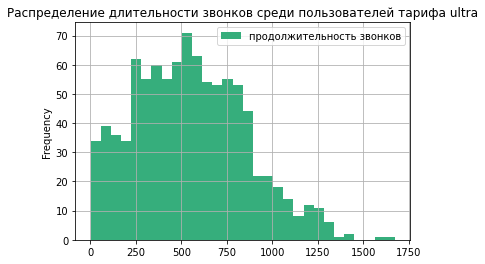

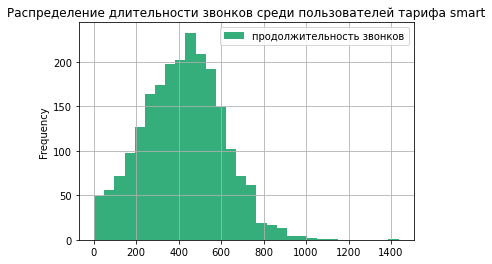

In [73]:
# построю гистограмму по распределению длительности звонков для пользователей тарифа ULTRA
(test
    .query('tariff == "ultra" and calls_duration > 0')
    .plot(y='calls_duration', 
          kind='hist', 
          bins=30,
          title = 'Распределение длительности звонков среди пользователей тарифа ultra',
          label='продолжительность звонков',
          grid=True, color='#36AE7C')
)
# построю гистограмму по распределению длительности звонков для пользователей тарифа SMART
(test
    .query('tariff == "smart" and calls_duration > 0')
    .plot(y='calls_duration', 
          kind='hist', 
          bins=30, 
          title='Распределение длительности звонков среди пользователей тарифа smart', 
          label='продолжительность звонков', 
          grid=True, color='#36AE7C')
)

plt.show()

In [51]:
print('Процент людей, которым недостаточно минут в тарифе ULTRA')
print(len(test.query('tariff == "ultra" and calls_duration > 3000')) / len(test.query('tariff == "ultra"')) * 100)
print('Процент людей, которым недостаточно минут в тарифе SMART')
print(len(test.query('tariff == "smart" and calls_duration > 500')) / len(test.query('tariff == "smart"')) * 100)

Процент людей, которым недостаточно минут в тарифе ULTRA
0.0
Процент людей, которым недостаточно минут в тарифе SMART
33.81165919282511


**вывод**

Исходя из двух гистограмм видно, что и для тарифа ultra  и для тарифа smart характерен скошеный вправо тип гистограмм.

Очевидно, что пользователи тарифа ultra используют больше минут, поскольку в их тарифном плане включено больше минут. Однако, никто из пользователей тарифа ultra не использует 3000 минут, которые предусмотрены в тарифе.

Для тарифа smart характерно следующее - примерно 34% пользователей недостаточно включенных в пакет минут. Они платят сверх пакета.

## Анализ смс активности пользователей

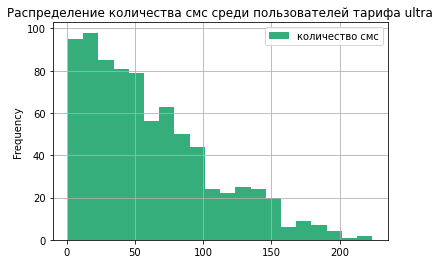

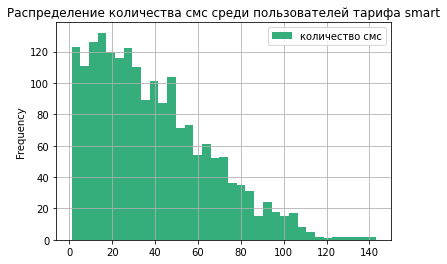

In [74]:
# построю гистограмму по распределению кол-ву смс для пользователей тарифа ULTRA
(test
    .query('tariff == "ultra"')
    .plot(y='messages', 
          kind='hist', 
          bins=20,
          title = 'Распределение количества смс среди пользователей тарифа ultra',
          label='количество смс',
          grid=True, color='#36AE7C')
)
# построю гистограмму по распределению кол-ву смс для пользователей тарифа SMART
(test
    .query('tariff == "smart"')
    .plot(y='messages', 
          kind='hist', 
          bins=35,
          title = 'Распределение количества смс среди пользователей тарифа smart',
          label='количество смс',
          grid=True, color='#36AE7C')
)

plt.show()

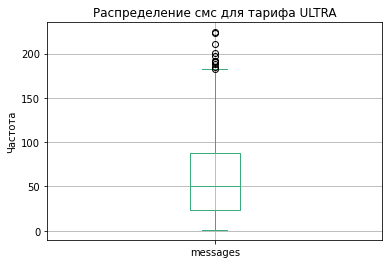

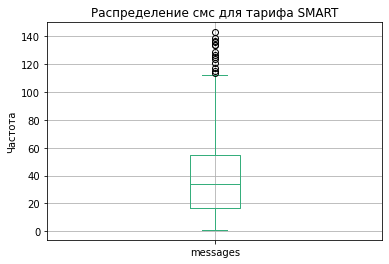

In [75]:
# построю диаграмму размаха для смс сообщений по двум тарифам
(test
    .query('tariff == "ultra"')
    .boxplot('messages', color='#36AE7C'),
         plt.title('Распределение смс для тарифа ULTRA'),
         plt.ylabel('Частота')
)
plt.show()

(test
    .query('tariff == "smart"')
    .boxplot('messages', color='#36AE7C'), 
         plt.title('Распределение смс для тарифа SMART'),
         plt.ylabel('Частота')
)

plt.show()

In [54]:
print('Процент людей, которым недостаточно смс в тарифе ULTRA')
print(len(test.query('tariff == "ultra" and messages > 1000')) / len(test.query('tariff == "ultra"')) * 100)
print('Процент людей, которым недостаточно смс в тарифе SMART')
print(len(test.query('tariff == "smart" and messages > 50')) / len(test.query('tariff == "smart"')) * 100)

Процент людей, которым недостаточно смс в тарифе ULTRA
0.0
Процент людей, которым недостаточно смс в тарифе SMART
25.291479820627806


In [55]:
print(test.query('tariff == "ultra"')['messages'].median())
print(test.query('tariff == "smart"')['messages'].median())

51.0
34.0


**вывод**

Исходя из данных получается что для тарифа ultra медианным значением сообщений является 51, при этом в пакете доступно 1000 сообщений, 0% из всех подключенных к этому тарифу выходили за этот лимит.

Для тарифа smart в пакете доступно 50смс сообщений, при этом, для 25,3% всех абонентов 50 сообщений, включеных в пакет - недостаточно.

## Анализ интернет активности пользователей

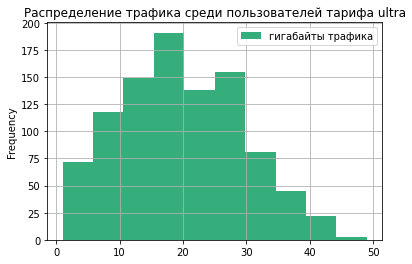

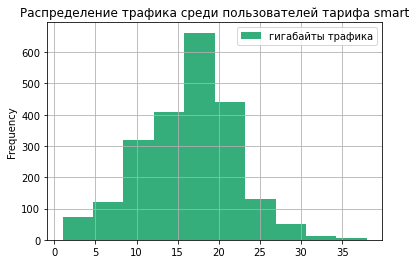

In [76]:
(test
    .query('tariff == "ultra"')
    .plot(y='total_gb', 
          kind='hist', 
          bins=10,
          title = 'Распределение трафика среди пользователей тарифа ultra',
          label='гигабайты трафика',
          grid=True, color='#36AE7C')
)

(test
    .query('tariff == "smart"')
    .plot(y='total_gb', 
          kind='hist', 
          bins=10,
          title = 'Распределение трафика среди пользователей тарифа smart',
          label='гигабайты трафика',
          grid=True, color='#36AE7C')
)

plt.show()

In [57]:
print('Процент людей, которым недостаточно гб в тарифе ULTRA')
print(len(test.query('tariff == "ultra" and total_gb > 30')) / len(test.query('tariff == "ultra"')) * 100)
print('Процент людей, которым недостаточно гб в тарифе SMART')
print(len(test.query('tariff == "smart" and total_gb > 15')) / len(test.query('tariff == "smart"')) * 100)

Процент людей, которым недостаточно гб в тарифе ULTRA
13.590263691683571
Процент людей, которым недостаточно гб в тарифе SMART
58.47533632286995


**вывод**

В тарифе ultra включено 30ГБ интеренета, при этом, исходя из данных, очевидно, что для 13,6% абонентов данного объема трафика недостаточно.

в тарифе smart включено 15ГБ интерента, однако для 58,5% абонентов данного кол-ва интеренета недостаточно.


## Анализ выручки по тарифам

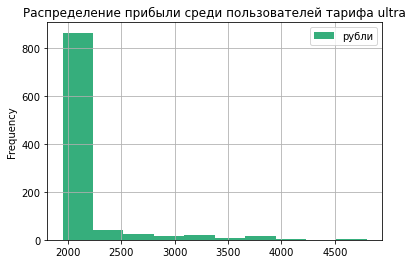

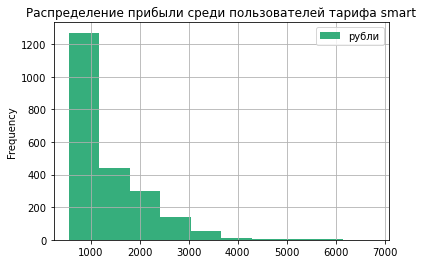

In [77]:
(test
    .query('tariff == "ultra"')
    .plot(y='total_cost', 
          kind='hist', 
          bins=10,
          title = 'Распределение прибыли среди пользователей тарифа ultra',
          label='рубли',
          grid=True, color='#36AE7C')
)

(test
    .query('tariff == "smart"')
    .plot(y='total_cost', 
          kind='hist', 
          bins=10,
          title = 'Распределение прибыли среди пользователей тарифа smart',
          label='рубли',
          grid=True, color='#36AE7C')
)

plt.show()

если отсортировать данные по одному месяцу, и разделить на 2 датафрейма - по тарифу ULTRA  и SMART, и посмотреть сколько денег приносит конкретный человек за конкретный месяц, используя один из двух тарифов.

In [59]:
# для начала сформирую 2 датафрейма
ultra = (test
        .query('tariff == "ultra" and month_x == 12')
        .pivot_table(index=['user_id', 'tariff'], values='total_cost', aggfunc='mean')
       )
smart = (test
        .query('tariff == "smart" and month_x == 12')
        .pivot_table(index=['user_id', 'tariff'], values='total_cost', aggfunc='mean')
       )


In [60]:
# сделаем таблицу, чтобы сравнить данные
summary = pd.DataFrame(
[['Кол-во абонентов тарифа ULTRA', len(ultra)],
['Кол-во абонентов тарифа SMART', len(smart)],
['Прибыль тарифа ULTRA за декабрь', ultra['total_cost'].sum()],
['Прибыль тарифа SMART за декабрь', smart['total_cost'].sum()],
['Выручка тарифа ultra за год', test.query('tariff=="ultra"')['total_cost'].sum()],
['Выручка тарифа smart за год', test.query('tariff=="smart"')['total_cost'].sum()]]
)
display(summary)

,0,1
0,Кол-во абонентов тарифа ULTRA,139.0
1,Кол-во абонентов тарифа SMART,337.0
2,Прибыль тарифа ULTRA за декабрь,297300.0
3,Прибыль тарифа SMART за декабрь,531965.0
4,Выручка тарифа ultra за год,2041050.0
5,Выручка тарифа smart за год,2875901.0


**вывод**

Исходя из данных тариф SMART приносит больше прибыли, поскольку абонентская плата низкая, он становится привлекательным для абонентов, однако малый объем включеных в пакет услуг вынуждает пользователей платить сверх абонентской платы.

## ГИПОТЕЗА №1

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [61]:
# здесь мы считали средние выручки по двум тарифам
mean

,mean_revenue,var_revenue,std_revenue
tariff,,,
smart,1290.0,818.0,669731.0
ultra,2070.0,376.0,141388.0


Средняя выручка тарифа smart - x1
Средняя выручка тарифа ultra - x2

* Ho: X2 - X1 = 0
* H1: X2 - X1 ≠ 0

* средние выручки тарифа smart и ultra равны
* средние выручки тарифа smart и ultra не равны

In [62]:
print('Нулевая гипотеза: средние выручки тарифа smart и ultra равны')
alpha = 0.01
array1 = test.query('tariff == "ultra"')
array2 = test.query('tariff == "smart"')
results = st.ttest_ind(array1['total_cost'], array2['total_cost'], equal_var=False)
# использую equal_var поскольку выборки разные по размеру 
print('p-значение ', results.pvalue)
if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('нулевая гипотеза не отвергается')
    
print('')


Нулевая гипотеза: средние выручки тарифа smart и ultra равны
p-значение  1.927011394420941e-250
отвергаем нулевую гипотезу



**вывод**

Полученное значение p-value меньше значения статистической важности, то есть имеются все основания для того чтобы отвергнуть нулевую гипотезу.

## ГИПОТЕЗА №2

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

X1 - средняя выручка пользователей из Москвы
X2 - средняя выручка пользователей других регионов

* Ho - средняя выручка пользователей Москвы и других регионов равны 
* H1 - средняя выручка пользователей Москвы и других регионов не равны

* Ho: X1 - X2 = 0
* H1: X1 - X2 ≠ 0

In [63]:
print('Нулевая гипотеза: средняя выручка пользователей Москвы и других регионов равны')

alpha = 0.05
array1 = test.query('city == "Москва"')
array2 = test.query('city != "Москва"')
results = st.ttest_ind(array1['total_cost'], array2['total_cost'], equal_var=False)
# использую equal_var поскольку выборки разные по размеру 
print('p-значение ', results.pvalue)

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('нулевая гипотеза не отвергается')
    
print('')

Нулевая гипотеза: средняя выручка пользователей Москвы и других регионов равны
p-значение  0.5216952110000278
нулевая гипотеза не отвергается



**вывод**

С вероятностью более 50% мы можем получить такое или большее сходство между средними выручками пользователей из Москвы и других регионов. Таким образом, такое высокое значение p-value не позволяет сделать вывод о том что средние выручки пользователей различаются.

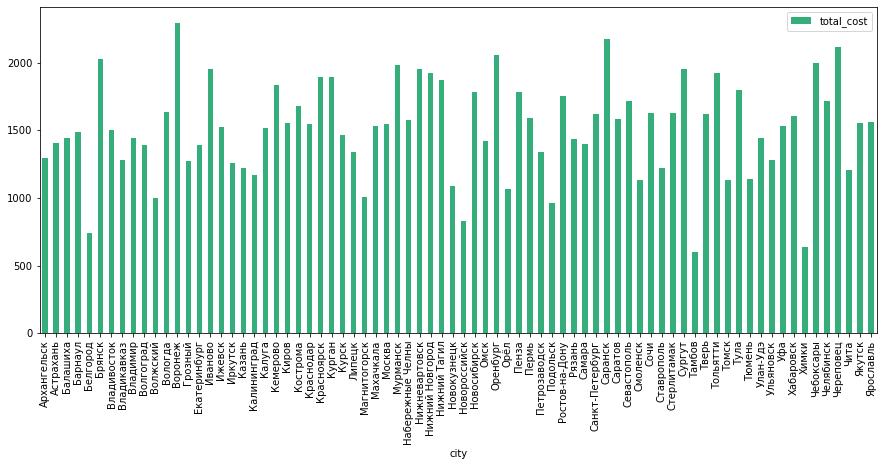

In [78]:
(test
 .pivot_table(index='city', 
              values='total_cost', 
              aggfunc='mean')
 .plot(kind='bar', figsize=(15,6), color='#36AE7C')
)
plt.show()

**ОБЩИЙ ВЫВОД**

**ТАРИФ ULTRA**

В среднем данный тариф приносит 2070 рублей в месяц.

При этом:
* 100% пользователей не истрачивают включеные в пакет минуты
* 100% пользователей не истрачивают включеные в пакет смс сообщения
* 13,6% пользователям не хватает включеных в пакет гигабайтов

**ТАРИФ SMART**

В среднем данный тариф приносит 868 рублей в месяц.

При этом:
* 34% пользователей не хватает включенных в пакет минут
* 25,3% пользователей не хватает включеных в тариф смс сообщений
* 58,5% пользователей не хватает включеных в пакет гигабайтов

**ГИПОТЕЗА 1**

Средняя выручка тарифа smart - x1
Средняя выручка тарифа ultra - x2

* Ho: X2 - X1 = 0
* H1: X2 - X1 ≠ 0

* средняя выручка тарифа ultra и тарифа smart равна 
* средняя выручка тарифа ultra и тарифа smart не равна 

Полученное p-value значительно ниже статистически значимой величины, которую мы задали. Таким образом у нас есть основания для того чтобы отвергнуть нулевую гипотезу.

**ГИПОТЕЗА 2**

X1 - средняя выручка пользователей из Москвы
X2 - средняя выручка пользователей других регионов

* Ho - средняя выручка пользователей Москвы и других регионов равны 
* H1 - средняя выручка пользователей Москвы и других регионов не равны

* Ho: X1 - X2 = 0
* H1: X1 - X2 ≠ 0

Полученное p-value равно >50%, это слишком большая вероятность получить такое различие случайно. Это значение слишком велико чтобы говорить о значимых различиях двух средних выручек.